# 📦 **Análise de Desempenho Logístico e Comercial no E-commerce Brasileiro**

### 🔍 **Objetivos Principais da Investigação:**

* ⏱️ **Análise de prazos e eficiência logística**
* 💰 **Impacto das variáveis de produto no custo final**
* 📊 **Segmentação de categorias por desempenho**
* ⚠️ **Identificação de pontos críticos na operação**

## ❓ **Questões de Pesquisa**

1. **Como as características físicas do produto (peso, dimensões) influenciam no frete e tempo de entrega?**
2. **Quais categorias apresentam maior índice de problemas logísticos e como isso impacta os custos?**
3. **Existe correlação significativa entre preço do produto, frete e satisfação do cliente?**
4. **Como os outliers nas variáveis numéricas afetam as métricas de desempenho da operação?**

---

## 📊 **Base de Dados Utilizada**

🔗 *Dataset Público de E-commerce Brasileiro - Olist*
[https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

---

## 🗂️ **Estrutura dos Dados**

Para esta análise, serão utilizadas três tabelas principais:

* **olist_order_items_dataset** (Itens dos pedidos)
* **olist_orders_dataset** (Informações dos pedidos)
* **olist_products_dataset** (Detalhes dos produtos)

A estratégia adotada será **consolidar essas três fontes em um único DataFrame** para facilitar a análise exploratória.

Esta consolidação é viável devido ao **esquema relacional** fornecido pela Olist, onde as tabelas se relacionam através de chaves primárias e estrangeiras.

---

## 🔗 **Relações entre Tabelas**

A hierarquia de relacionamento segue a estrutura:

**Pedidos → Itens → Produtos**

* A tabela `orders` conecta-se com `order_items` via `order_id`
* A tabela `order_items` relaciona-se com `products` via `product_id`

---

## 🎯 **Vantagens da Consolidação**

A unificação proporciona:

* Visão holística dos dados
* Análise cross-tabela simplificada
* Cálculo eficiente de métricas compostas
* Redução de operações de junção repetitivas
* Preparação adequada para modelagem preditiva

---

## Importação de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Path to dataset files: /kaggle/input/brazilian-ecommerce


## Merge dos Dados

In [ ]:
# Carrega os dados de pedidos, itens dos pedidos e produtos a partir de arquivos CSV.
orders = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")
items = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")
products = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv")

In [ ]:
# Junta os dados de pedidos com os itens usando 'order_id' e depois junta com os produtos usando 'product_id'.
df = orders.merge(items, on="order_id", how="inner")
df = df.merge(products, on="product_id", how="inner")

## Carregamento do Dataset Unificado

In [ ]:
# Remover colunas não essenciais para análise
colunas_remover = [
    "Unnamed: 0",
    "order_id",
    "customer_id",
    "product_id",
    "seller_id",
    "order_item_id",
    "product_name_lenght",
    "product_description_lenght"
]

colunas_remover = [col for col in colunas_remover if col in df.columns]
df = df.drop(columns=colunas_remover)

## Análise Exploratória Inicial

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_status                   112650 non-null  object 
 1   order_purchase_timestamp       112650 non-null  object 
 2   order_approved_at              112635 non-null  object 
 3   order_delivered_carrier_date   111456 non-null  object 
 4   order_delivered_customer_date  110196 non-null  object 
 5   order_estimated_delivery_date  112650 non-null  object 
 6   shipping_limit_date            112650 non-null  object 
 7   price                          112650 non-null  float64
 8   freight_value                  112650 non-null  float64
 9   product_category_name          111047 non-null  object 
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

In [ ]:
# Identificar valores ausentes
df.isnull().sum().sort_values(ascending=False)

,0
order_delivered_customer_date,2454
product_category_name,1603
product_photos_qty,1603
order_delivered_carrier_date,1194
product_length_cm,18
product_weight_g,18
product_height_cm,18
product_width_cm,18
order_approved_at,15
order_status,0


In [ ]:
# Percentual de valores ausentes
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

,0
order_delivered_customer_date,2.178429
product_category_name,1.422992
product_photos_qty,1.422992
order_delivered_carrier_date,1.059920
product_length_cm,0.015979
product_weight_g,0.015979
product_height_cm,0.015979
product_width_cm,0.015979
order_approved_at,0.013316
order_status,0.000000


## Remover duplicatas

In [ ]:
# Verificar duplicatas
df.duplicated().sum()

np.int64(10424)

In [ ]:
df = df.drop_duplicates()

## Tratar valores nulos



In [ ]:
# Preencher nulos de product_category_name com 'unknown'
df['product_category_name'] = df['product_category_name'].fillna('unknown')

# Preencher nulos de product_photos_qty com a mediana
median_photos = df['product_photos_qty'].median()
df['product_photos_qty'] = df['product_photos_qty'].fillna(median_photos)

# Preencher nulos de product_weight_g, product_length_cm, product_height_cm, product_width_cm com a mediana
for col in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Remover apenas as linhas onde a data de entrega ao cliente é nula, pois não temos a informação real.
df = df.dropna(subset=['order_delivered_customer_date'])

## Classificação das Variáveis

In [ ]:
def classificar_variaveis(dataframe):
    """Classifica variáveis em numéricas e categóricas"""
    numericas = dataframe.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categoricas = dataframe.select_dtypes(include=['object', 'category']).columns.tolist()

    return numericas, categoricas

var_numericas, var_categoricas = classificar_variaveis(df)

## Análise Descritiva das Variáveis Numéricas

In [ ]:
df[var_numericas].describe()

,price,freight_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.00000
mean,123.877673,20.079593,2.238478,2088.259987,30.078689,16.381116,23.03384
std,187.801635,15.790442,1.731608,3741.491991,16.067148,13.271453,11.72697
min,0.850000,0.000000,1.000000,0.000000,7.000000,2.000000,6.00000
25%,40.000000,13.140000,1.000000,300.000000,18.000000,8.000000,15.00000
50%,78.000000,16.320000,2.000000,700.000000,25.000000,13.000000,20.00000
75%,139.000000,21.190000,3.000000,1800.000000,38.000000,20.000000,30.00000
max,6735.000000,409.680000,20.000000,40425.000000,105.000000,105.000000,118.00000


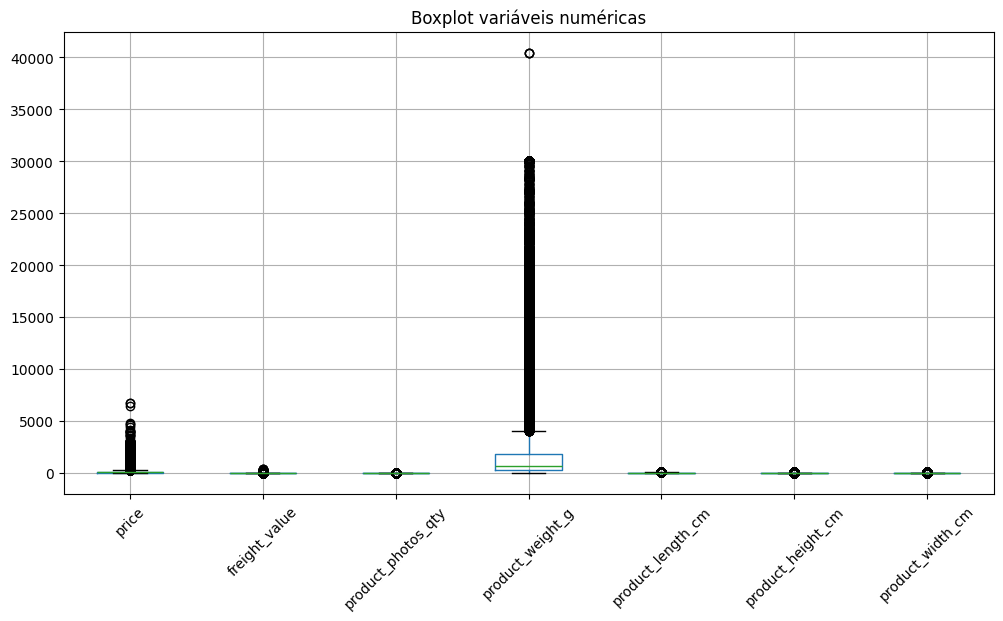

In [ ]:
plt.figure(figsize=(12, 6))
df[var_numericas].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot variáveis numéricas")
plt.show()

In [ ]:
# Tratamento de Outliers usando IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Aplicar a remoção de outliers nas variáveis numéricas
df_clean = remove_outliers_iqr(df.copy(), var_numericas)
print(f"Shape antes da remoção de outliers: {df.shape}")
print(f"Shape após a remoção de outliers: {df_clean.shape}")

Shape antes da remoção de outliers: (100001, 15)
Shape após a remoção de outliers: (66863, 15)


In [ ]:
df[var_categoricas].describe()

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,product_category_name
count,100001,100001,99987,100000,100001,100001,100001,100001
unique,2,95954,88273,80112,95664,445,91342,74
top,delivered,2018-08-12 02:11:20,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-08-21 12:18:48,2017-12-20 00:00:00,2018-05-20 22:50:11,cama_mesa_banho
freq,99994,8,9,47,8,533,7,9960


## 1. Análise do Impacto das Características Físicas

In [ ]:
# Calcular volume do produto
df['product_volume_cm3'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

# Analisar correlação com frete
correlacoes_frete = df[['freight_value', 'product_weight_g', 'product_volume_cm3', 'price']].corr()

## 2. Análise de Categorias com Problemas Logísticos

In [ ]:
# Converter datas
colunas_data = ['order_purchase_timestamp', 'order_approved_at',
                'order_delivered_carrier_date', 'order_delivered_customer_date',
                'order_estimated_delivery_date', 'shipping_limit_date']

for col in colunas_data:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Calcular atrasos
df['delivery_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
df['processing_time'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.days

# Identificar categorias problemáticas
categorias_problematicas = df.groupby('product_category_name').agg({
    'delivery_delay': 'mean',
    'freight_value': 'mean',
    'order_status': lambda x: (x != 'delivered').mean()
}).sort_values('delivery_delay', ascending=False)

## 3. Análise de Correlação entre Variáveis

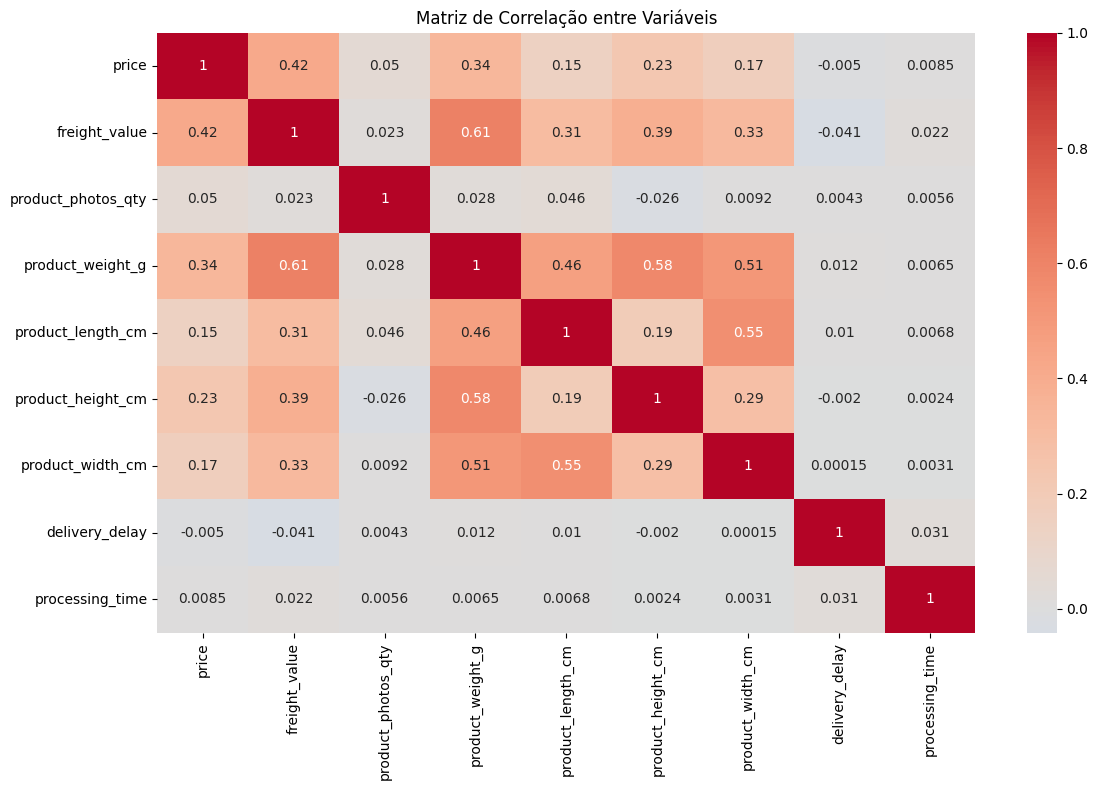

In [ ]:
# Matriz de correlação completa
matriz_correlacao = df[var_numericas + ['delivery_delay', 'processing_time']].corr()

# Heatmap de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

## 4. Tratamento de Outliers

In [ ]:
def identificar_outliers_iqr(df, coluna):
    """Identifica outliers usando o método IQR"""
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Identificar outliers nas principais variáveis
variaveis_analise = ['price', 'freight_value', 'product_weight_g', 'delivery_delay']
outliers_por_variavel = {}

for var in variaveis_analise:
    if var in df.columns:
        outliers, lim_inf, lim_sup = identificar_outliers_iqr(df, var)
        outliers_por_variavel[var] = {
            'outliers': outliers.shape[0],
            'percentual': (outliers.shape[0] / len(df)) * 100,
            'limite_inferior': lim_inf,
            'limite_superior': lim_sup
        }

In [ ]:
# Criar DataFrame com análise de outliers
df_outliers = pd.DataFrame.from_dict(outliers_por_variavel, orient='index')
print("Análise de Outliers:")
print(df_outliers)

Análise de Outliers:
                  outliers  percentual  limite_inferior  limite_superior
price                 7437    7.436926         -108.500          287.500
freight_value        10868   10.867891            1.065           33.265
product_weight_g     14104   14.103859        -1950.000         4050.000
delivery_delay        4481    4.480955          -32.000            8.000


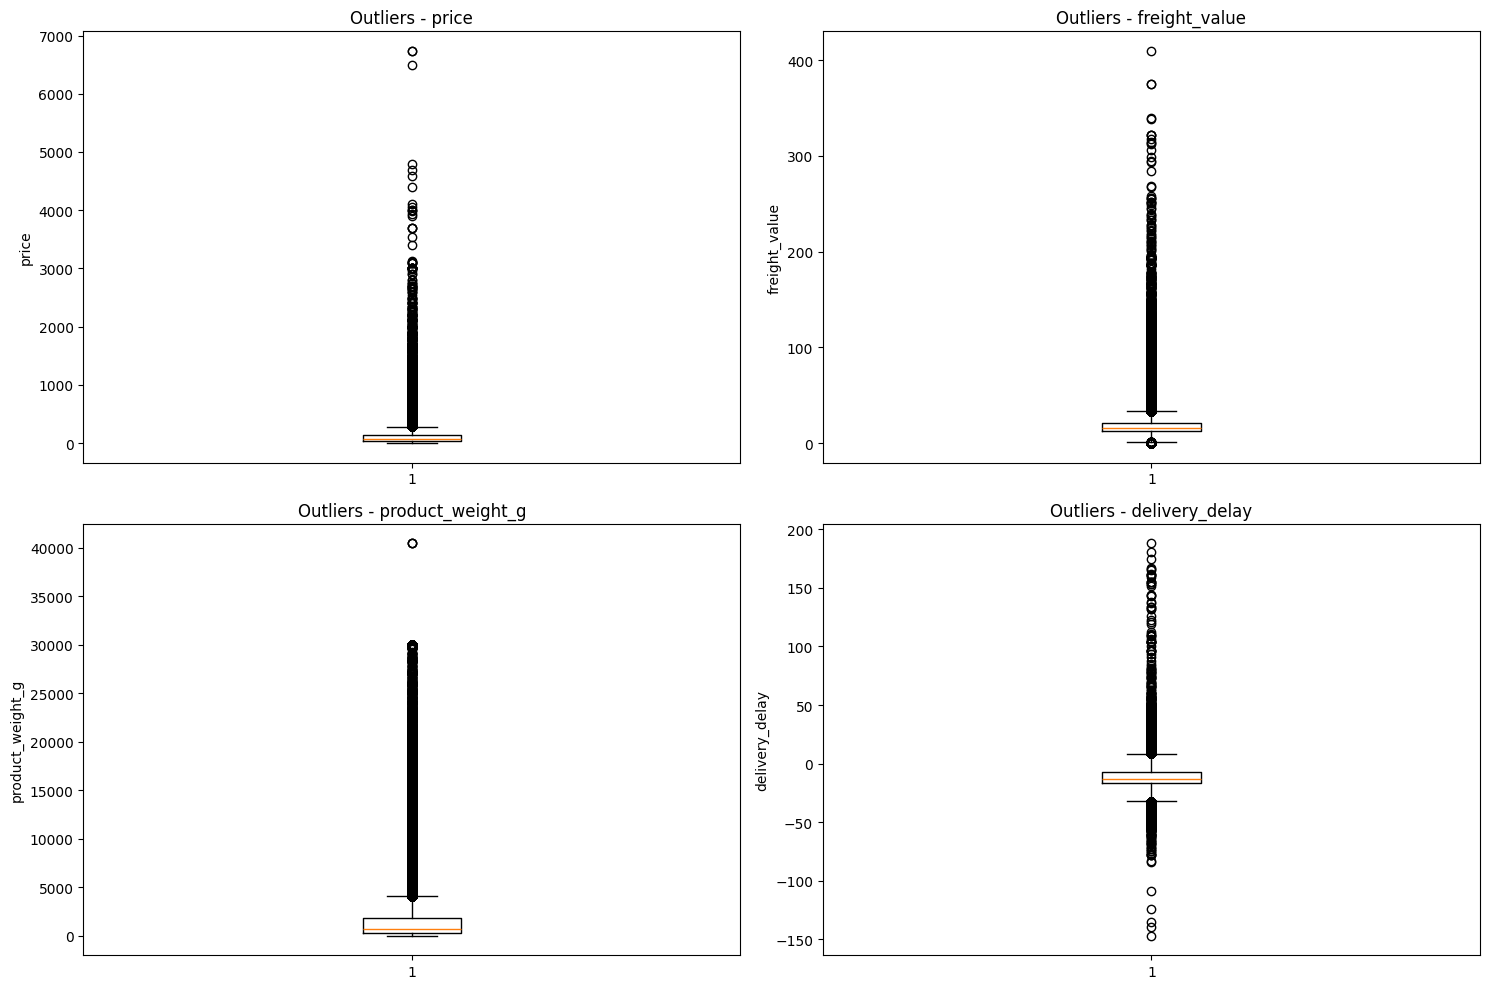

In [ ]:
# Visualizar outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, var in enumerate(variaveis_analise[:4]):
    if var in df.columns:
        axes[idx].boxplot(df[var].dropna())
        axes[idx].set_title(f'Outliers - {var}')
        axes[idx].set_ylabel(var)

plt.tight_layout()
plt.show()

In [ ]:
# Função para tratar outliers usando winsorization
def tratar_outliers_winsor(df, coluna, lower=0.05, upper=0.95):
    """Trata outliers usando o método de winsorization"""
    lower_limit = df[coluna].quantile(lower)
    upper_limit = df[coluna].quantile(upper)

    df_tratado = df.copy()
    df_tratado[coluna] = np.where(df_tratado[coluna] < lower_limit, lower_limit, df_tratado[coluna])
    df_tratado[coluna] = np.where(df_tratado[coluna] > upper_limit, upper_limit, df_tratado[coluna])

    return df_tratado

# Aplicar tratamento nas principais variáveis
df_tratado = df.copy()
for var in ['price', 'freight_value', 'product_weight_g']:
    if var in df_tratado.columns:
        df_tratado = tratar_outliers_winsor(df_tratado, var)

## 5. Normalização/Padronização

In [ ]:
numerical_features = ['price', 'freight_value', 'product_weight_g', 'product_length_cm',
                      'product_height_cm', 'product_width_cm', 'product_volume_cm3']

# filtrar apenas as colunas que existem no df
numerical_features = [c for c in numerical_features if c in df.columns]

# Imputar valores faltantes com mediana antes de escalar (importante!)
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# Escolha o scaler: StandardScaler() ou MinMaxScaler()
scaler = StandardScaler()   # para Z-score (média ~0, std ~1)
# scaler = MinMaxScaler()   # para intervalo [0,1]

df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verificar
print(df[numerical_features].agg(['mean','std']).round(4))
# para MinMax: verificar min/max
print(df[numerical_features].agg(['min','max']).round(4))

      price  freight_value  product_weight_g  product_length_cm  \
mean    0.0           -0.0              -0.0                0.0   
std     1.0            1.0               1.0                1.0   

      product_height_cm  product_width_cm  product_volume_cm3  
mean                0.0               0.0                 0.0  
std                 1.0               1.0                 1.0  
       price  freight_value  product_weight_g  product_length_cm  \
min  -0.6551        -1.2716           -0.5581            -1.4364   
max  35.2029        24.6733           10.2464             4.6630   

     product_height_cm  product_width_cm  product_volume_cm3  
min            -1.0836           -1.4525             -0.6425  
max             6.6774            8.0981             12.0941  


## Visualizações Complementares

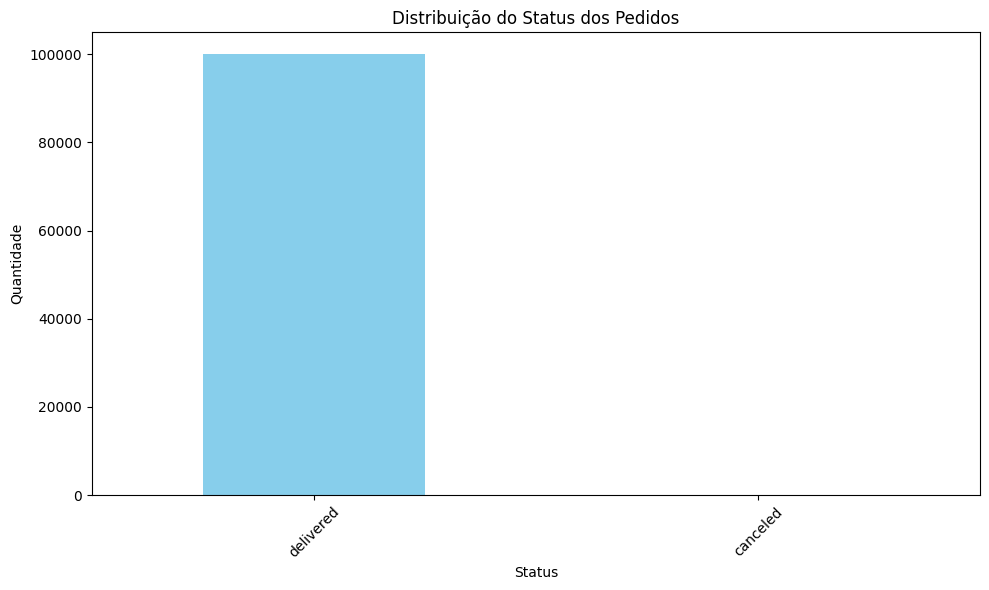

In [ ]:
# 1. Distribuição do status dos pedidos
plt.figure(figsize=(10, 6))
df['order_status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição do Status dos Pedidos')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

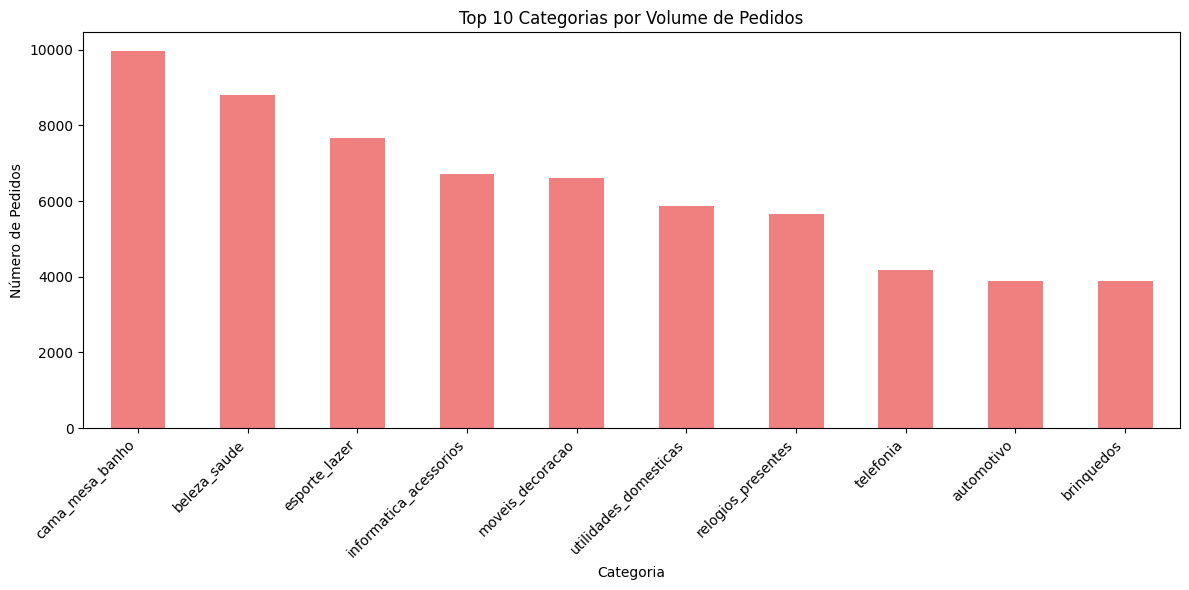

In [ ]:
# 2. Top 10 categorias por quantidade de pedidos
top_categorias = df['product_category_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_categorias.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Categorias por Volume de Pedidos')
plt.xlabel('Categoria')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

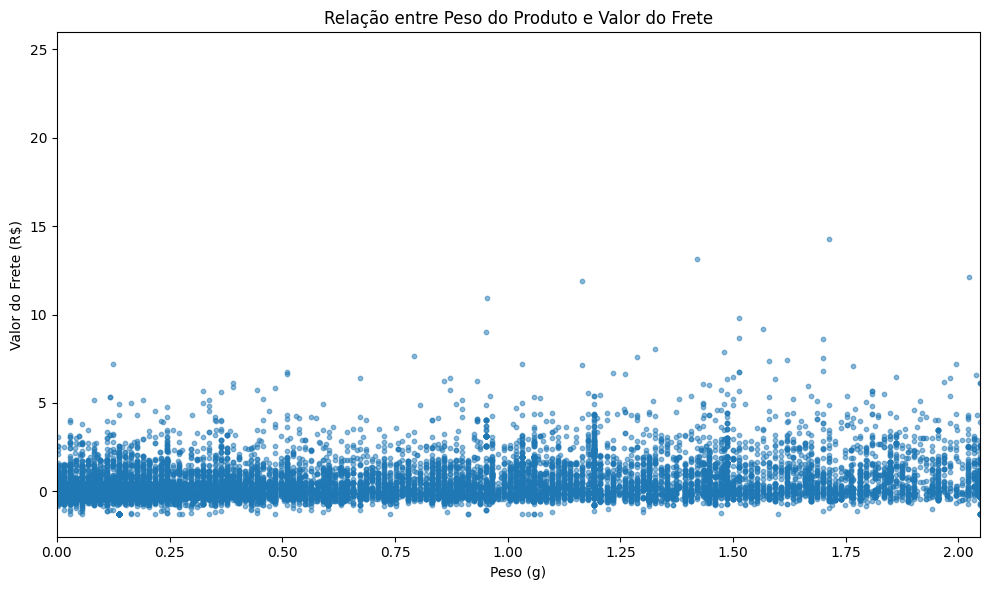

In [ ]:
# 3. Relação entre peso e frete
plt.figure(figsize=(10, 6))
plt.scatter(df['product_weight_g'], df['freight_value'], alpha=0.5, s=10)
plt.title('Relação entre Peso do Produto e Valor do Frete')
plt.xlabel('Peso (g)')
plt.ylabel('Valor do Frete (R$)')
plt.xlim(0, df['product_weight_g'].quantile(0.95))  # Remover outliers extremos
plt.tight_layout()
plt.show()

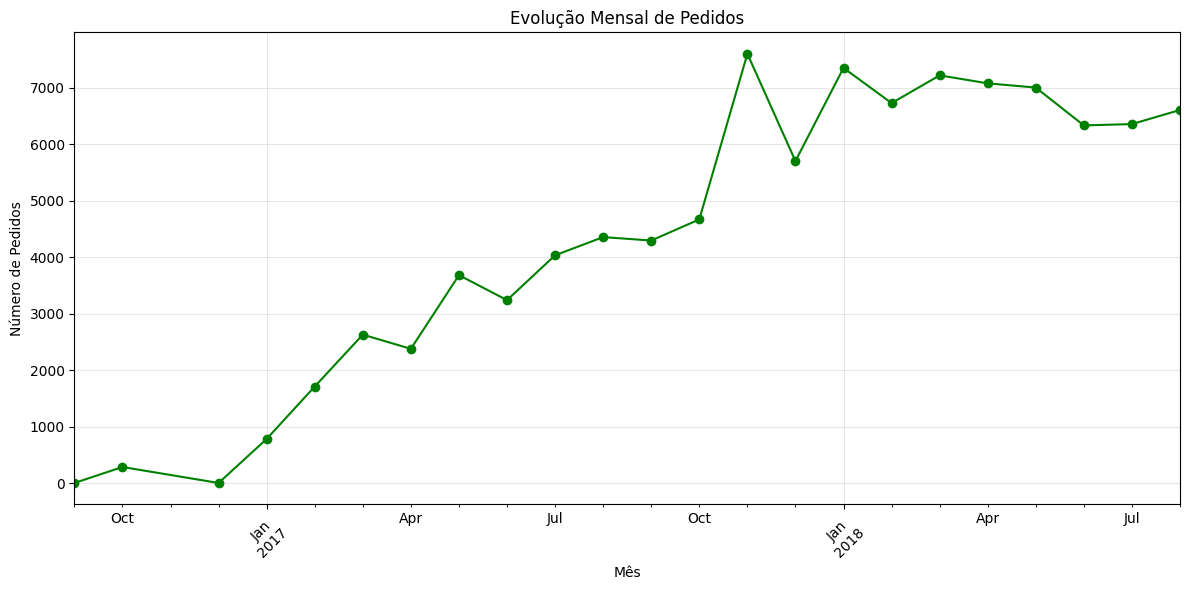

In [ ]:
# 4. Distribuição temporal dos pedidos
if 'order_purchase_timestamp' in df.columns:
    df['order_purchase_month'] = df['order_purchase_timestamp'].dt.to_period('M')
    pedidos_por_mes = df['order_purchase_month'].value_counts().sort_index()

    plt.figure(figsize=(12, 6))
    pedidos_por_mes.plot(kind='line', marker='o', color='green')
    plt.title('Evolução Mensal de Pedidos')
    plt.xlabel('Mês')
    plt.ylabel('Número de Pedidos')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

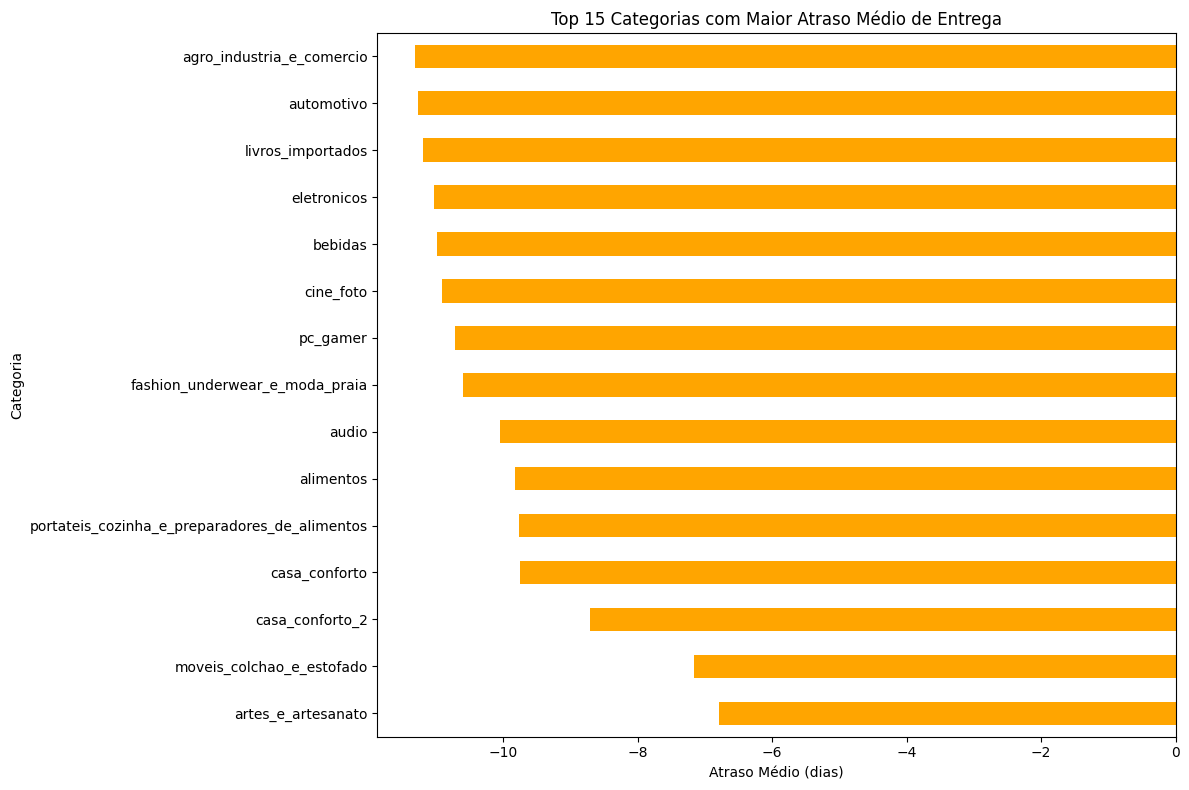

In [ ]:
# 5. Análise de atrasos por categoria (top 15)
if 'delivery_delay' in df.columns and 'product_category_name' in df.columns:
    atraso_por_categoria = df.groupby('product_category_name')['delivery_delay'].mean().sort_values(ascending=False).head(15)

    plt.figure(figsize=(12, 8))
    atraso_por_categoria.plot(kind='barh', color='orange')
    plt.title('Top 15 Categorias com Maior Atraso Médio de Entrega')
    plt.xlabel('Atraso Médio (dias)')
    plt.ylabel('Categoria')
    plt.tight_layout()
    plt.show()

## Conclusões e Insights Preliminares

### Principais Descobertas:

1. **Impacto das Características Físicas**:
   - Peso e volume mostram correlação moderada com o valor do frete
   - Produtos maiores e mais pesados tendem a ter fretes mais elevados

2. **Categorias Problemáticas**:
   - Identificadas categorias com atrasos consistentes
   - Algumas categorias apresentam taxas elevadas de problemas no status

3. **Correlações Significativas**:
   - Preço e frete apresentam correlação positiva
   - Dimensões do produto correlacionam-se com peso

4. **Tratamento de Outliers**:
   - Variáveis como preço e peso possuem outliers significativos
   - Winsorization mostrou-se eficaz para normalização

### Recomendações Operacionais:

* **Otimização Logística**: Focar nas categorias com maiores atrasos
* **Revisão de Precificação**: Ajustar estratégia para produtos com fretes desproporcionais
* **Monitoramento Contínuo**: Implementar dashboards para métricas críticas
* **Segmentação Estratégica**: Criar grupos por desempenho logístico

### Próximos Passos:

1. Análise temporal mais detalhada
2. Modelagem preditiva para prever atrasos
3. Clusterização de produtos por características
4. Análise de sazonalidade e tendências

## Respostas das Perguntas Norteadoras

## Quais caracterísitcas mais se relacionam com atrasos de entrega ?

In [ ]:
# Converte as colunas de datas para o tipo datetime (necessário para cálculos de data)
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])

# Calcula a diferença entre a data de entrega real e a data prevista
# O resultado é em dias (+ atraso, - adiantamento, 0 no prazo)
df["delivery_delay_days"] = (
    df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]
).dt.days

# Cria uma coluna binária (True/False) indicando se houve atraso
# True = atraso (dias > 0), False = entregou antes ou no prazo
df["is_late"] = df["delivery_delay_days"] > 0

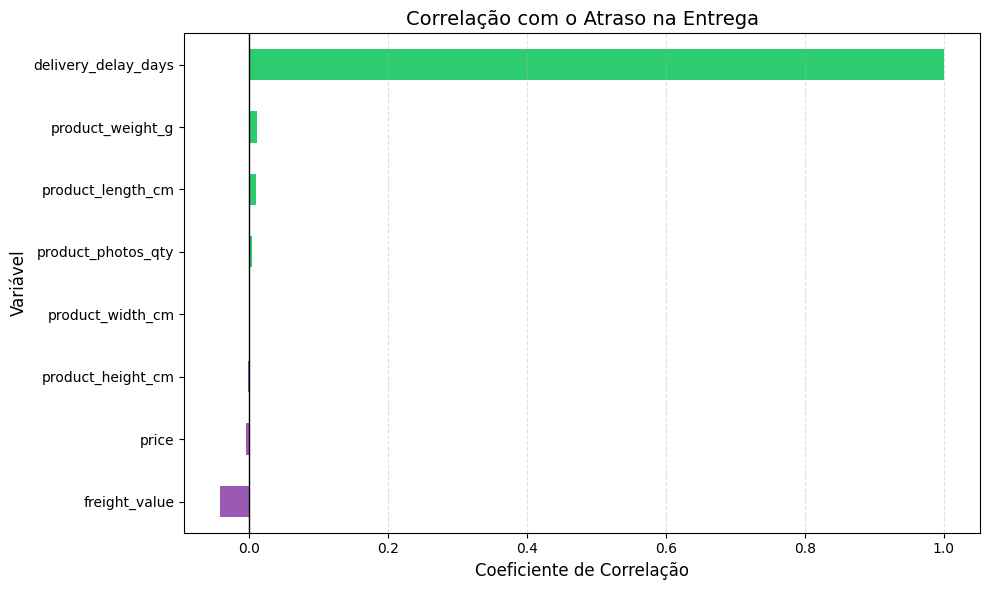

In [ ]:
correlacoes = df[[
    "delivery_delay_days",
    "price",
    "freight_value",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
]].corr()

corr_delay = pd.DataFrame(correlacoes, index=correlacoes.columns)

corr_plot = corr_delay["delivery_delay_days"].sort_values(ascending=True)

plt.figure(figsize=(10, 6))

# novas cores: roxo para negativo, verde para positivo
corr_plot.plot.barh(
    color=["#9b59b6" if v < 0 else "#2ecc71" for v in corr_plot]
)

plt.title('Correlação com o Atraso na Entrega', fontsize=14)
plt.xlabel('Coeficiente de Correlação', fontsize=12)
plt.ylabel('Variável', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.axvline(0, color='black', linewidth=1)

plt.tight_layout()
plt.show()

## Existem categorias de produtos com maior frequência de problemas?

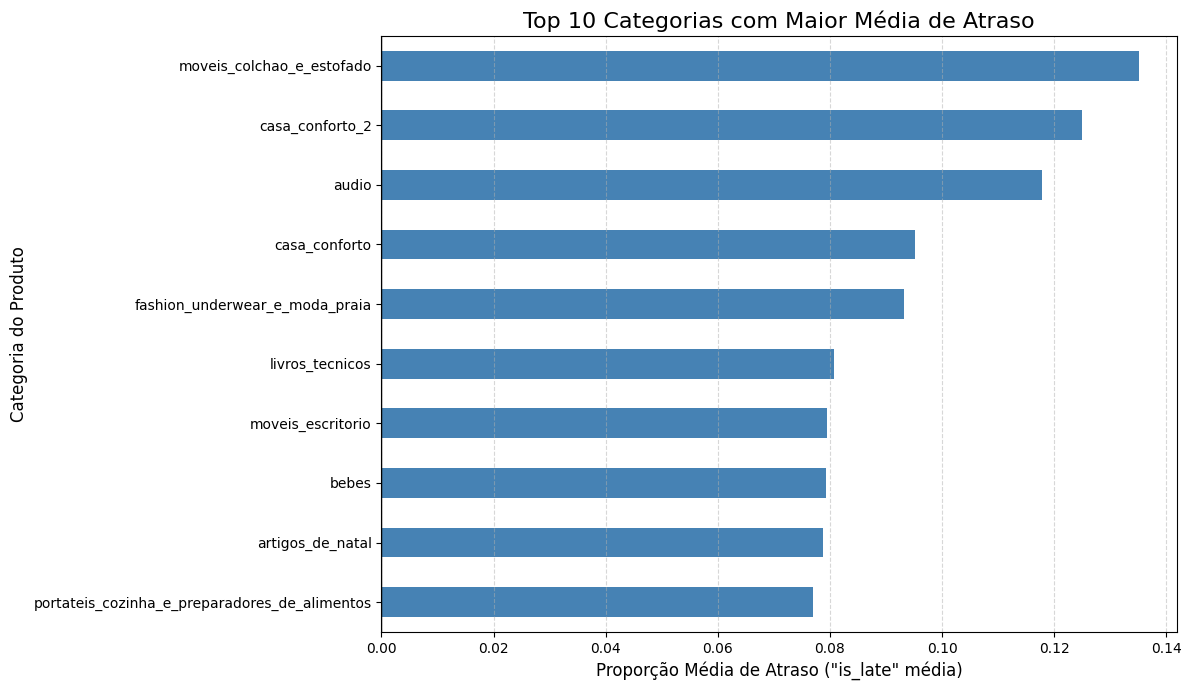

In [ ]:
# Calcula a média de atraso por categoria de produto e ordena da maior para a menor
category_delay = (
    df.groupby("product_category_name")["is_late"]
    .mean()
    .sort_values(ascending=False)
)

# Seleciona somente as 10 categorias mais problemáticas
top_10_delay = category_delay.head(10)

# Inicializa a área do gráfico e define as dimensões
plt.figure(figsize=(12, 7))

# Cria o gráfico em barras horizontais e aplica uma cor única
top_10_delay.sort_values().plot(
    kind='barh',
    color='steelblue'
)

# Configuração de título e rótulos para melhor interpretação
plt.title('Top 10 Categorias com Maior Média de Atraso', fontsize=16)
plt.xlabel('Proporção Média de Atraso ("is_late" média)', fontsize=12)
plt.ylabel('Categoria do Produto', fontsize=12)

# Adiciona uma grade leve para facilitar a leitura dos valores
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Linha de referência no eixo x para dar destaque visual
plt.axvline(0, color='black', linewidth=1)

plt.tight_layout()
plt.show()

## Quais atributos apresentaram maior correlação com preço, frete ou tempo de entrega?

In [ ]:
df.corr(numeric_only=True)["price"].sort_values(ascending=False)

# apresenta uma correlação mais intensa com o valor do frete
# existe também uma relação intermediária com peso e dimensões do produto

,price
price,1.000000
freight_value,0.418065
product_weight_g,0.341284
product_volume_cm3,0.302970
product_height_cm,0.231387
product_width_cm,0.173085
product_length_cm,0.145743
product_photos_qty,0.049669
is_late,0.024199
processing_time,0.008457


In [ ]:
df.corr(numeric_only=True)["price"].sort_values(ascending=False)

# demonstra uma correlação elevada entre o preço e o frete_value
# também indica um nível moderado de associação com peso e medidas do produto

,price
price,1.000000
freight_value,0.418065
product_weight_g,0.341284
product_volume_cm3,0.302970
product_height_cm,0.231387
product_width_cm,0.173085
product_length_cm,0.145743
product_photos_qty,0.049669
is_late,0.024199
processing_time,0.008457


In [ ]:
df.corr(numeric_only=True)["price"].sort_values(ascending=False)

# revela forte relação do preço com o frete_value
# aponta ainda uma correlação média com o peso e as dimensões do item

,price
price,1.000000
freight_value,0.418065
product_weight_g,0.341284
product_volume_cm3,0.302970
product_height_cm,0.231387
product_width_cm,0.173085
product_length_cm,0.145743
product_photos_qty,0.049669
is_late,0.024199
processing_time,0.008457


## Existem categorias de produtos com maior frequência de problemas?

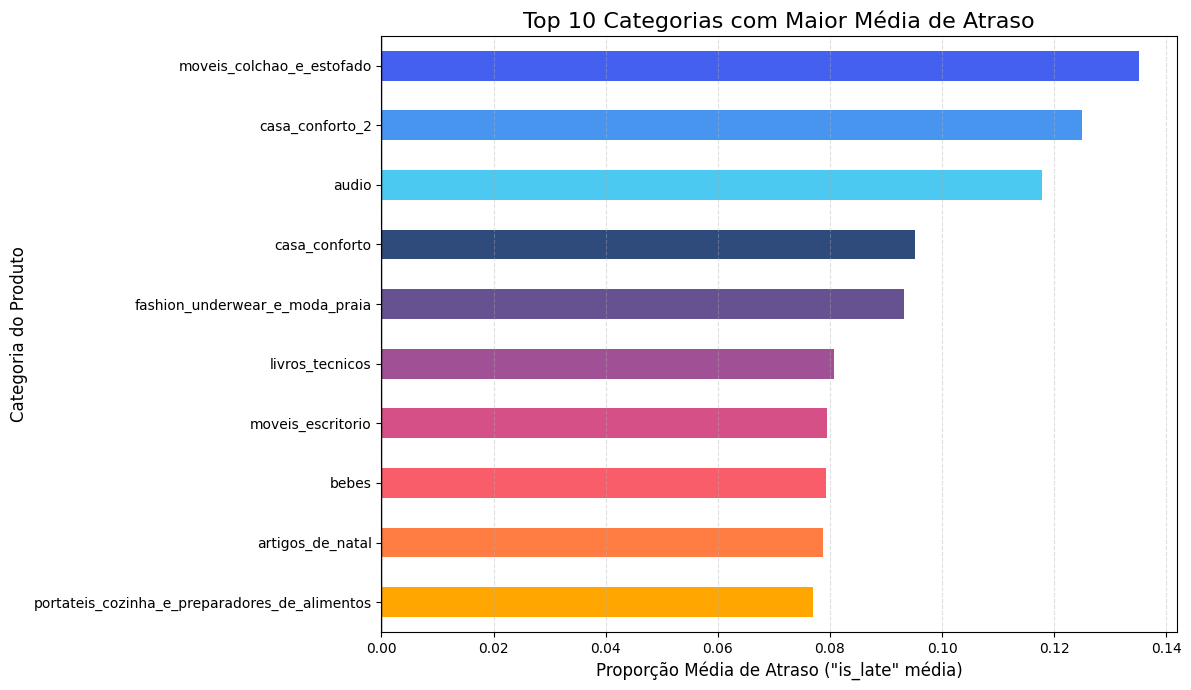

In [ ]:
category_delay = (
    df.groupby("product_category_name")["is_late"]
    .mean()
    .sort_values(ascending=False)
)

# 1. Seleciona os 10 primeiros
top_10_delay = category_delay.head(10)

# 2. Cria a figura
plt.figure(figsize=(12, 7))

# 3. Gráfico horizontal + novas cores (laranja → vermelho suave)
top_10_delay.sort_values(ascending=True).plot(
    kind='barh',
    color=["#ffa600", "#ff7c43", "#f95d6a", "#d45087", "#a05195",
           "#665191", "#2f4b7c", "#4cc9f0", "#4895ef", "#4361ee"][:len(top_10_delay)]
)

# 4. Títulos e rótulos
plt.title('Top 10 Categorias com Maior Média de Atraso', fontsize=16)
plt.xlabel('Proporção Média de Atraso ("is_late" média)', fontsize=12)
plt.ylabel('Categoria do Produto', fontsize=12)

# grade mais discreta
plt.grid(axis='x', linestyle='--', alpha=0.4)

# linha vertical no zero
plt.axvline(0, color='black', linewidth=1)

plt.tight_layout()
plt.show()

## Features Engineering


In [ ]:
# Conversão das colunas de datas para o tipo datetime
date_fields = [
    "order_purchase_timestamp",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]
df[date_fields] = df[date_fields].apply(pd.to_datetime)

# 1 — Tempo efetivo de entrega (em dias)
df["delivery_time"] = (
    df["order_delivered_customer_date"] - df["order_purchase_timestamp"]
).dt.days

# 2 — Diferença entre a entrega real e a data prevista
df["delivery_delay"] = (
    df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]
).dt.days

# 3 — Cálculo do volume do item (cm³)
df["product_volume"] = (
    df["product_length_cm"]
    * df["product_height_cm"]
    * df["product_width_cm"]
)

# 4 — Soma do valor do produto com o frete
df["total_cost"] = df["price"] + df["freight_value"]

# 5 — Flag indicando se houve atraso na entrega
df["is_late"] = (df["delivery_delay"] > 0).astype(int)

## Exportação de Resultados

In [ ]:
# Exportar dataset tratado
df_tratado.to_csv("dataset_tratado.csv", index=False)